In [1]:
%run flow_tools.py

In [2]:
df2 = pd.concat([pd.read_csv('notch_res.csv', index_col=0),
                pd.read_csv('snipr_res.csv', index_col=0)]).reset_index(drop=True)

/opt/homebrew/Caskroom/miniforge/base/envs/flow/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
expression_df = (df2[(df2['Receiver']=='None')]
                 .groupby(['Sender','Replicate'])['APC-A']
                 .median()
                 .reset_index())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


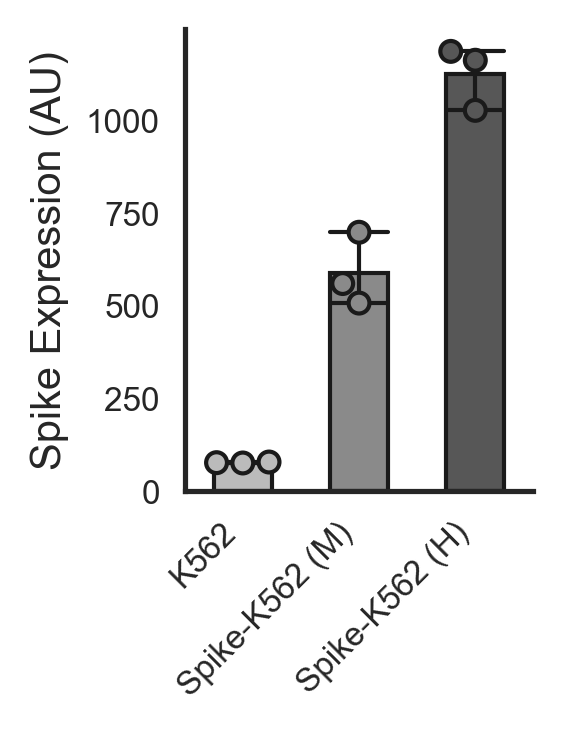

In [4]:
with sns.color_palette([grey, "#8A8A8A", "#575757"]):
    fig, ax = plt.subplots(1,1,figsize=(1.5,2), dpi=300)
    g = sns.swarmplot(data=expression_df, x='Sender', y='APC-A', hue='Sender',
                  order=['K562', 'Spike-K562 (M)', 'Spike-K562 (H)'],
                  hue_order=['K562', 'Spike-K562 (M)', 'Spike-K562 (H)'], 
                  edgecolor='k', linewidth=1)
    sns.barplot(data=expression_df, x='Sender', y='APC-A', hue='Sender',
                  order=['K562', 'Spike-K562 (M)', 'Spike-K562 (H)'],
                  hue_order=['K562', 'Spike-K562 (M)', 'Spike-K562 (H)'], 
            dodge=False, edgecolor='k', capsize=0.5, width=0.5, saturation=1,
                estimator='mean',
            err_kws={'linewidth': 1, 'color':'k'})
    g.legend().remove()
    g.set_ylabel('Spike Expression (AU)')
    g.set_xlabel('')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.savefig(outputdir+'target-expression.pdf', bbox_inches='tight')

In [5]:
expression_df = (df2[(df2['Sender']=='None')]
                 .groupby(['Receiver','Replicate'])['APC-A']
                 .median()
                 .reset_index())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


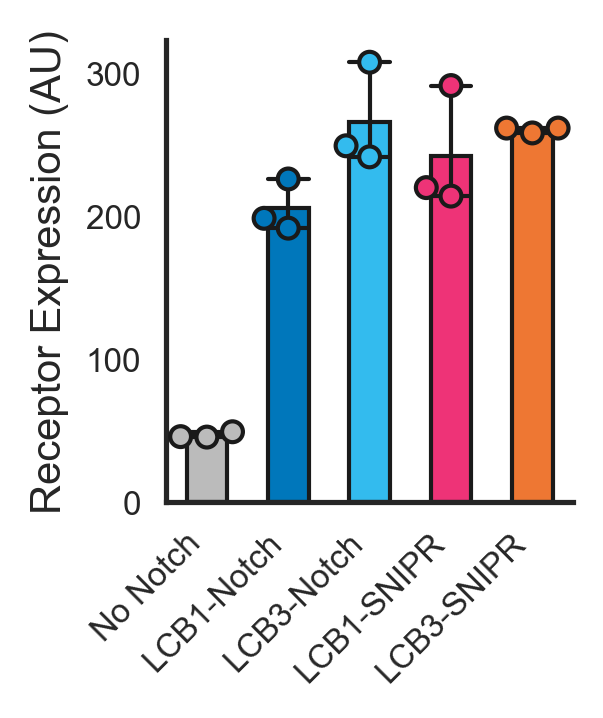

In [6]:
notches = ['No Notch','LCB1-Notch', 'LCB3-Notch','LCB1-SNIPR', 'LCB3-SNIPR']
with sns.color_palette([grey, blue, cyan, magenta, orange]):
    fig, ax = plt.subplots(1,1,figsize=(1.75,2), dpi=300)
    g = sns.swarmplot(data=expression_df, x='Receiver', y='APC-A', hue='Receiver',
                  order=notches,
                  hue_order=notches, 
                  edgecolor='k', linewidth=1)
    sns.barplot(data=expression_df, x='Receiver', y='APC-A', hue='Receiver',
                  order=notches,
                  hue_order=notches, 
            dodge=False, edgecolor='k', capsize=0.5, width=0.5, saturation=1,
                estimator='mean',
            err_kws={'linewidth': 1, 'color':'k'})
    g.legend().remove()
    g.set_ylabel('Receptor Expression (AU)')
    g.set_xlabel('')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.savefig(outputdir+'receptor-expression.pdf', bbox_inches='tight')

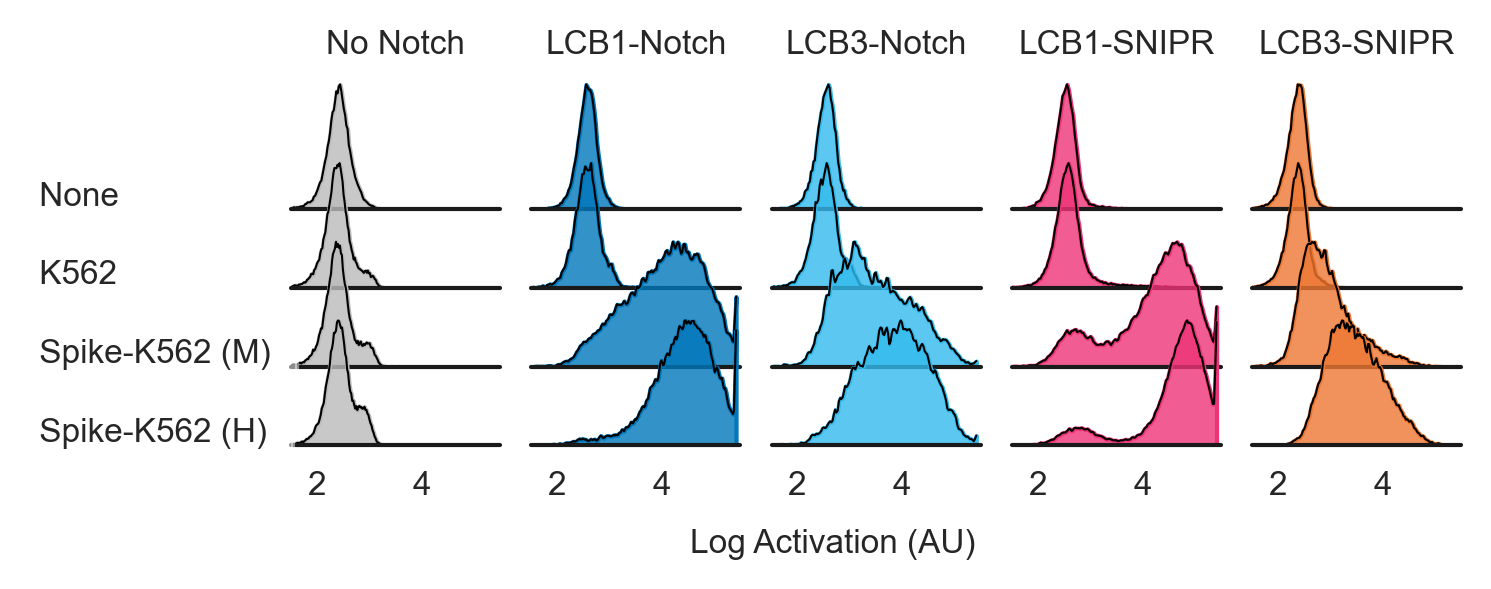

In [25]:
senders = ['None', 'K562', 'Spike-K562 (M)','Spike-K562 (H)']
notches = ['No Notch','LCB1-Notch', 'LCB3-Notch','LCB1-SNIPR', 'LCB3-SNIPR']
with sns.color_palette([grey, blue, cyan, magenta, orange]):
    g = sns.FacetGrid(data=df2[(df2['Receiver'].isin(notches)) &
                               (df2['logFITC-A'] > 5)],
                      row='Sender', col='Receiver', sharey=False, aspect=1.8, height=0.5, 
                      hue='Receiver', row_order=senders, 
                      col_order=notches, hue_order=notches, xlim=[1.5, 5.5])
    g.map(sns.kdeplot, "logDAPI-A", fill=True, alpha=0.8, bw_adjust=0.2, cut=0)
    g.map(sns.kdeplot, "logDAPI-A", color="black", lw=0.5, bw_adjust=.2, cut=0)
    g.map(plt.axhline, y=0, lw=1, color='k', clip_on=False)

    # Set the subplots to overlap
    left_axes = [g.facet_axis(r, 0) for r in range(len(senders))]
    for ax in left_axes:
        dose = ax.get_title().split("=")[1].split('|')[0]
        ax.text(-1.25,0.1, "{}".format(dose), ha="left", va="center", 
                bbox=dict(facecolor='white', alpha=0.5), transform=ax.transAxes)

    g.set_titles("")
    top_axes = [g.facet_axis(0,c) for c in range(len(notches))]
    for ax, notch in zip(top_axes, notches):
        ax.set_title(notch,fontsize=8)
    [ax.set(facecolor=(0, 0, 0, 0)) for ax in g.axes.flat]

    # Remove axes details that don't play well with overlap
    g.set(yticks=[])
    g.despine(bottom=True, left=True)
    g.set_xlabels('')
    g.fig.supxlabel('Log Activation (AU)', fontsize=SMALL_SIZE, y=0.05)
    g.set_ylabels('')
    g.fig.subplots_adjust(hspace=-.4, wspace=0.15)
    g.fig.set_dpi(300)
    plt.savefig(outputdir+'sncompare-activation.pdf', bbox_inches='tight')

In [9]:
filters = ((df2['logFITC-A'] > 5) &
           (df2.Receiver.isin(notches)))
df_summary = (df2[filters]
              .groupby(['Sender','Receiver','Replicate'])['logDAPI-A']
              .median()
              .reset_index())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


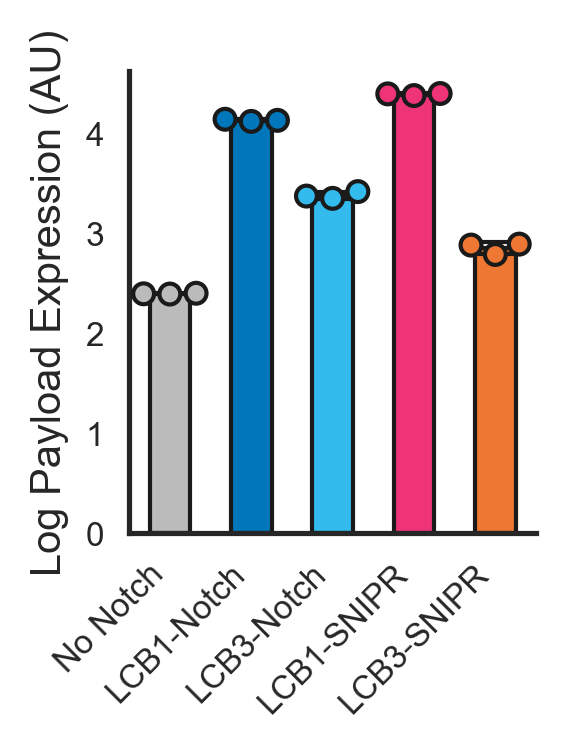

In [10]:
notches = ['No Notch','LCB1-Notch', 'LCB3-Notch','LCB1-SNIPR', 'LCB3-SNIPR']
with sns.color_palette([grey, blue, cyan, magenta, orange]):
    fig, ax = plt.subplots(1,1,figsize=(1.75,2), dpi=300)
    g = sns.swarmplot(data=df_summary[(df_summary['Receiver'].isin(notches)) &
                                      (df_summary['Sender']=='Spike-K562 (M)')], 
                      x='Receiver', y='logDAPI-A', hue='Receiver',
                  order=notches,
                  hue_order=notches, 
                  edgecolor='k', linewidth=1)
    sns.barplot(data=df_summary[(df_summary['Receiver'].isin(notches)) &
                                      (df_summary['Sender']=='Spike-K562 (M)')], 
                      x='Receiver', y='logDAPI-A', hue='Receiver',
                  order=notches,
                  hue_order=notches,
                errorbar='sd', saturation=1,
                estimator='mean',
            dodge=False, edgecolor='k', capsize=0.5, width=0.5,
            err_kws={'linewidth': 1, 'color':'k'})
    g.legend().remove()
    g.set_ylabel('Log Payload Expression (AU)')
    g.set_xlabel('')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.savefig(outputdir+'sncompare-activation-median.pdf', bbox_inches='tight')

In [12]:
def find_on_state(series):
    dist = series.values[:,np.newaxis]
    model = GaussianMixture(2, covariance_type='spherical', random_state=237).fit(dist)
    on_component = model.means_[np.argmax(model.means_)]
    return on_component

notches = ['LCB1-Notch', 'LCB3-Notch','LCB1-SNIPR', 'LCB3-SNIPR']
filters = ((df2['logFITC-A'] > 5) &
           (df2.Receiver.isin(notches)) &
           (df2.Sender=='Spike-K562 (H)'))
df_summary = df2[filters].groupby(['Sender','Receiver','Replicate'])['logDAPI-A'].agg(find_on_state).reset_index()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


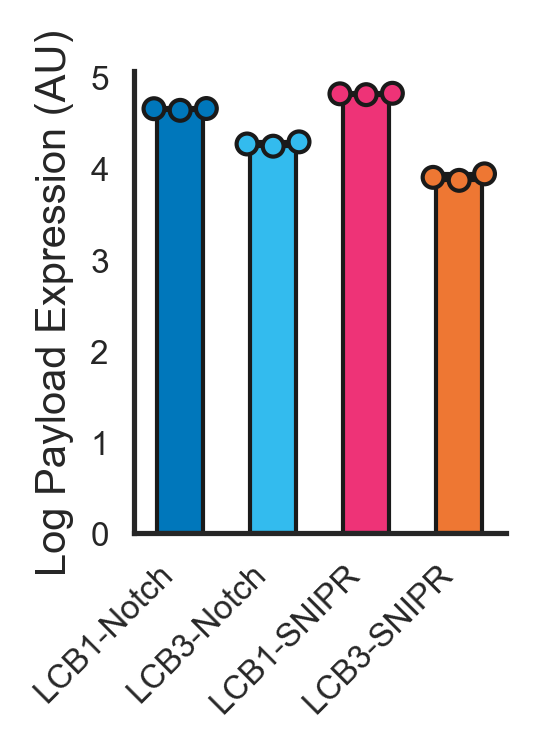

In [13]:
notches = ['LCB1-Notch', 'LCB3-Notch','LCB1-SNIPR', 'LCB3-SNIPR']
with sns.color_palette([blue, cyan, magenta, orange]):
    fig, ax = plt.subplots(1,1,figsize=(1.6,2), dpi=300)
    g = sns.swarmplot(data=df_summary[(df_summary['Receiver'].isin(notches))], 
                      x='Receiver', y='logDAPI-A', hue='Receiver',
                  order=notches,
                  hue_order=notches, 
                  edgecolor='k', linewidth=1)
    sns.barplot(data=df_summary[(df_summary['Receiver'].isin(notches))], 
                      x='Receiver', y='logDAPI-A', hue='Receiver',
                  order=notches,
                  hue_order=notches,
                errorbar='sd', saturation=1,
                estimator='mean',
            dodge=False, edgecolor='k', capsize=0.5, width=0.5,
            err_kws={'linewidth': 1, 'color':'k'})
    g.legend().remove()
    g.set_ylabel('Log Payload Expression (AU)')
    g.set_xlabel('')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.savefig(outputdir+'sncompare-activation-median.pdf', bbox_inches='tight')

In [16]:
notches = ['No Notch', 'LCB1-Notch', 'LCB3-Notch','LCB1-SNIPR', 'LCB3-SNIPR']
filters = ((df2['logFITC-A'] > 5) &
           (df2.Receiver.isin(notches)))
dist = df2[filters]['logDAPI-A'].values[:,np.newaxis]
model = GaussianMixture(2, covariance_type='spherical', random_state=237).fit(dist)
off_component = np.argmin(model.means_)
df_summary = (df2[filters]
              .groupby(['Sender','Receiver','Replicate'])['logDAPI-A']
              .apply(lambda x: 100*(1-np.sum(model.predict(x.values[:,np.newaxis])==off_component)/len(x)))
              .reset_index())

/var/folders/kl/1m52jmh17ldcnypjswtqvg240000gn/T/ipykernel_65441/161734683.py:3: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  g = sns.pointplot(data=df_summary[(df_summary['Receiver'].isin(notches))],


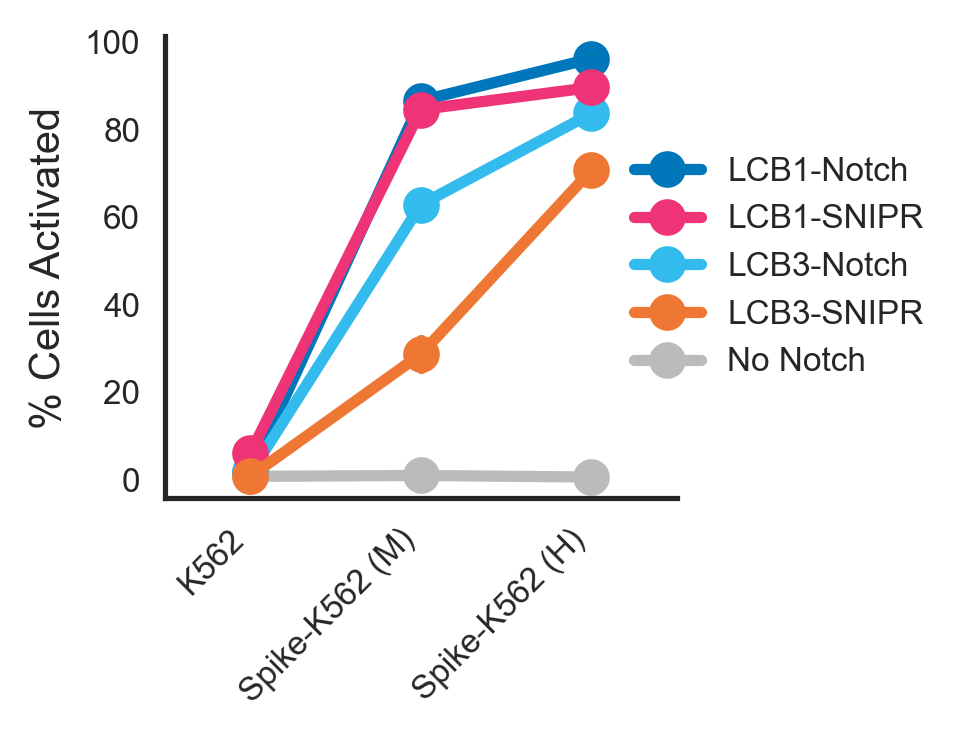

In [17]:
with sns.color_palette([grey, blue, cyan, magenta, orange]):
    fig, ax = plt.subplots(1,1,figsize=(2.2,2), dpi=300)
    g = sns.pointplot(data=df_summary[(df_summary['Receiver'].isin(notches))],
                    y='logDAPI-A', x='Sender', hue='Receiver', join=True, 
                    order=['K562', 'Spike-K562 (M)', 'Spike-K562 (H)'], errorbar='sd',
                estimator='mean',
                    hue_order=notches)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('')
    plt.ylabel('% Cells Activated')
    handles, labels = ax.get_legend_handles_labels()
    order = [1,3,2,4,0]
    plt.legend([handles[idx] for idx in order],
               [labels[idx] for idx in order],
               frameon=False, loc='center', bbox_to_anchor=(1.2,0.5))
    sns.despine()
    plt.savefig(outputdir+'sncompare-activation-dose.pdf', bbox_inches='tight')

In [19]:
df_summary.groupby(['Sender','Receiver']).agg(['mean','std'])

Replicate       logDAPI-A          
                               mean  std       mean       std
Sender         Receiver                                      
K562           LCB1-Notch         2  1.0   1.558327  0.138756
               LCB1-SNIPR         2  1.0   6.001359  0.281866
               LCB3-Notch         2  1.0   1.366118  0.118519
               LCB3-SNIPR         2  1.0   0.670583  0.080424
               No Notch           2  1.0   0.671170  0.097302
None           LCB1-Notch         2  1.0   0.704970  0.067159
               LCB1-SNIPR         2  1.0   2.242751  0.070938
               LCB3-Notch         2  1.0   0.512569  0.013809
               LCB3-SNIPR         2  1.0   0.527799  0.031571
               No Notch           2  1.0   0.465025  0.059709
Spike-K562 (H) LCB1-Notch         2  1.0  96.148211  0.280303
               LCB1-SNIPR         2  1.0  89.563281  0.493753
               LCB3-Notch         2  1.0  83.619535  0.509228
               LCB3-SNIPR         2  1.0  70.636700  1.889258
               No Notch           2  1.0   0.515247  0.075651
Spike-K562 (M) LCB1-Notch         2  1.0  86.528768  0.552669
               LCB1-SNIPR         2  1.0  84.509380  0.718814
               LCB3-Notch         2  1.0  62.790186  1.651108
               LCB3-SNIPR         2  1.0  28.598958  3.260610
               No Notch           2  1.0   0.878446  0.046680